
# **1. Understanding the data**


In [22]:
import os
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from statsmodels.tsa.api import Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error



In [23]:
data = pd.read_csv("/content/train.csv")

In [24]:
data = data.drop(["store","item"], axis = 1)
data.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [25]:
data["date"]  = pd.to_datetime(data["date"],  errors='coerce')
data["date_M"] = data["date"].dt.to_period("M")
df = data.groupby("date_M").sum().reset_index()
df.isna().sum()
df["month"] = df.index
df

,date_M,sales,month
0,2013-01,454904,0
1,2013-02,459417,1
2,2013-03,617382,2
3,2013-04,682274,3
4,2013-05,763242,4
5,2013-06,795597,5
6,2013-07,855922,6
7,2013-08,766761,7
8,2013-09,689907,8
9,2013-10,656587,9


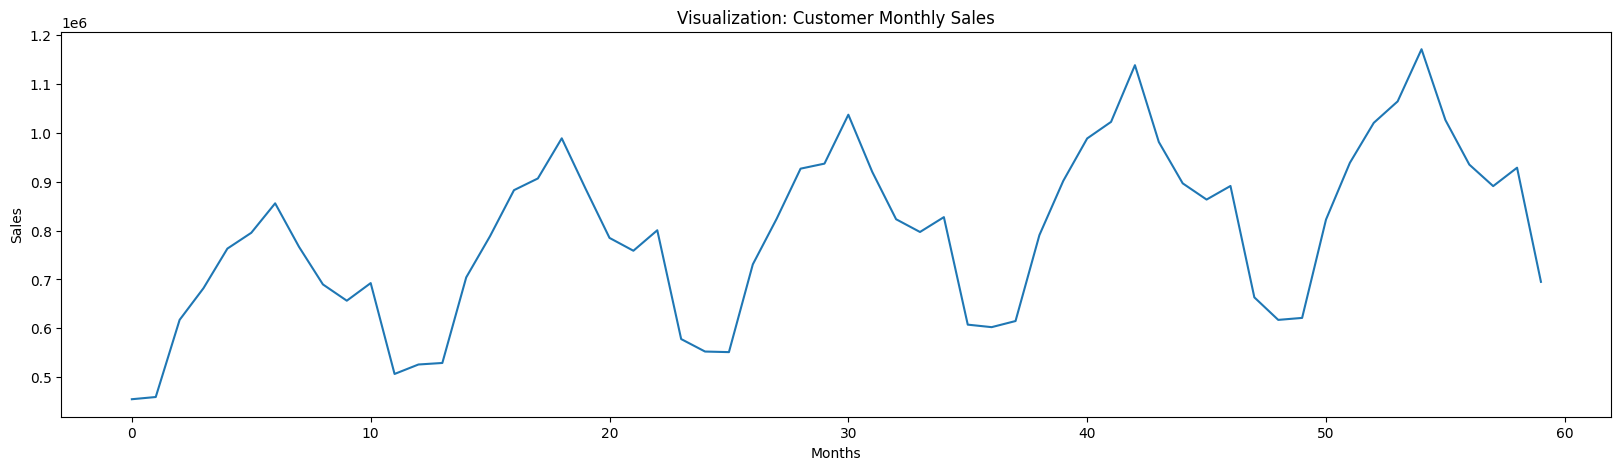

In [26]:
#Data Visualization
plt.figure(figsize=(20,5))
plt.plot(df["month"], df["sales"])
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Visualization: Customer Monthly Sales")
plt.show()

In [27]:
values = df.sales
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))
if res[1] <= 0.05:
  print("Data is stationary")
else:
  print("Data is not stationary")

Augmneted Dickey_fuller Statistic: -5.247519
p-value: 0.000007
critical values at different levels:
	1%: -3.575
	5%: -2.924
	10%: -2.600
Data is stationary


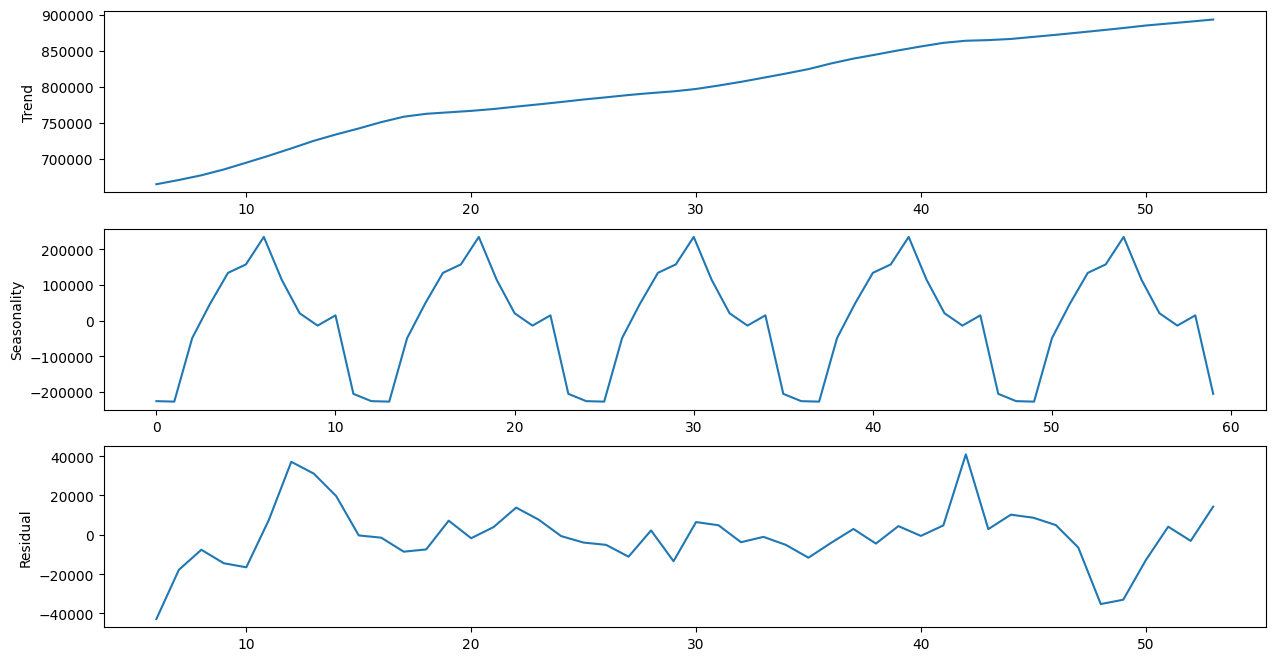

In [28]:
res1 = seasonal_decompose(df['sales'], model = "additive", period = 12)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
res1.trend.plot(ax=ax1,ylabel = "Trend")
res1.seasonal.plot(ax=ax2,ylabel = "Seasonality")
res1.resid.plot(ax=ax3,ylabel = "Residual")

plt.show()

# **2. Triple Exponential Smoothing**

In [29]:
train_data = df['sales'].iloc[:-12]
test_data = df['sales'].iloc[-12:]
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()
predictions = model_fit.forecast(len(test_data))

In [30]:
print(train_data,test_data)

0      454904
1      459417
2      617382
3      682274
4      763242
5      795597
6      855922
7      766761
8      689907
9      656587
10     692643
11     506607
12     525987
13     529117
14     704301
15     788914
16     882877
17     906842
18     989010
19     885596
20     785124
21     758883
22     800783
23     578048
24     552513
25     551317
26     730951
27     824467
28     926902
29     937184
30    1037350
31     920401
32     823332
33     797253
34     827645
35     607572
36     602439
37     614957
38     790881
39     901950
40     988730
41    1022664
42    1138718
43     981494
44     896831
45     863637
46     891448
47     663411
Name: sales, dtype: int64 48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64


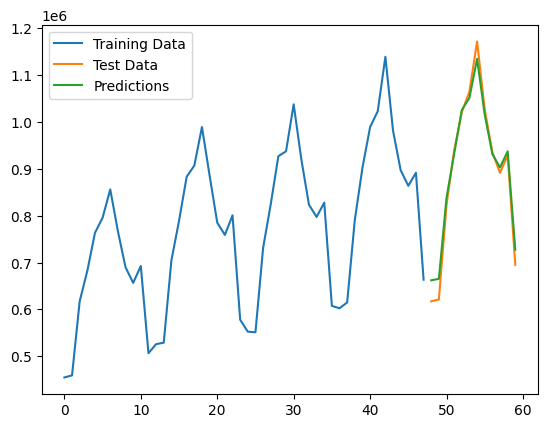

In [31]:
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Test Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [32]:
test_data.mean()


894478.3333333334

In [33]:
mape = mean_absolute_percentage_error(test_data, predictions)
mape

0.02510657086570436

# **3. ARIMA and Seasonal ARIMA**

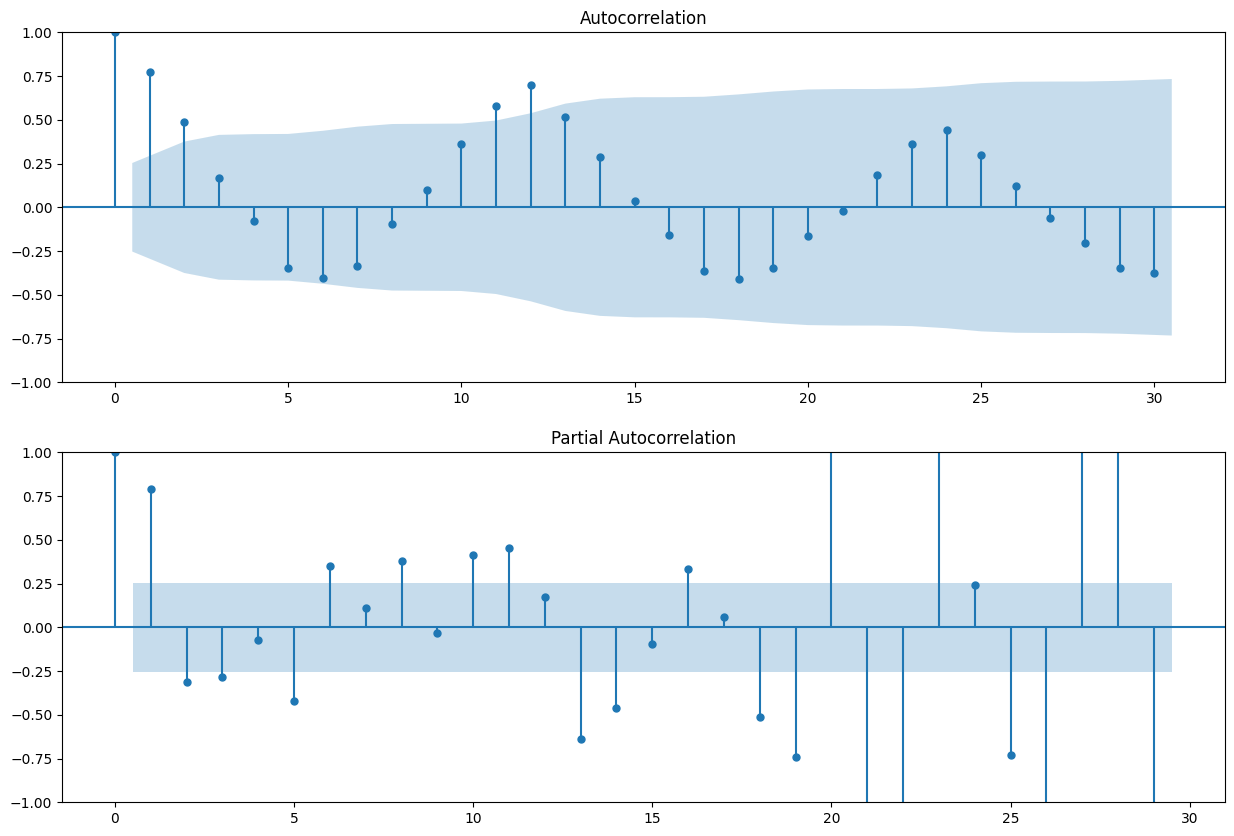

In [34]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales'], lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales'], lags=29,ax=ax2)

## **3.a. ARIMA**

In [35]:
pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [37]:
stepwise_fit = auto_arima(df['sales'], trace = True, supress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1510.947, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1537.273, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1537.232, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1537.873, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1535.368, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1510.051, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1537.154, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1538.420, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1540.109, Time=0.13 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1538.650, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1523.728, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1517.671, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1508.046, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1535.114, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -750.023
Date:                Sat, 15 Apr 2023   AIC                           1508.046
Time:                        11:28:05   BIC                           1516.356
Sample:                             0   HQIC                          1511.290
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.001  -1039.426      0.000      -1.002      -0.998
ma.L1          1.9418      0.274      7.098      0.000       1.406       2.478
ma.L2          0.9490      0.271      3.500      0.000       0.418       1.480
sigma2      7.661e+09   1.18e-11   6.51e+20      0.000    7.66e+09    7.66e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.72   Prob(JB):                         0.46
Heteroskedasticity (H):               0.87   Skew:                            -0.07
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.46e+36. Standard errors may be unstable.
"""

In [38]:
df

,date_M,sales,month
0,2013-01,454904,0
1,2013-02,459417,1
2,2013-03,617382,2
3,2013-04,682274,3
4,2013-05,763242,4
5,2013-06,795597,5
6,2013-07,855922,6
7,2013-08,766761,7
8,2013-09,689907,8
9,2013-10,656587,9


In [39]:
training_data = df.drop(['date_M'], axis = 1)

In [40]:
train=training_data.dropna().iloc[:-12]
test=training_data.dropna().iloc[-12:]
print(train.shape,test.shape)
print(train)

(48, 2) (12, 2)
      sales  month
0    454904      0
1    459417      1
2    617382      2
3    682274      3
4    763242      4
5    795597      5
6    855922      6
7    766761      7
8    689907      8
9    656587      9
10   692643     10
11   506607     11
12   525987     12
13   529117     13
14   704301     14
15   788914     15
16   882877     16
17   906842     17
18   989010     18
19   885596     19
20   785124     20
21   758883     21
22   800783     22
23   578048     23
24   552513     24
25   551317     25
26   730951     26
27   824467     27
28   926902     28
29   937184     29
30  1037350     30
31   920401     31
32   823332     32
33   797253     33
34   827645     34
35   607572     35
36   602439     36
37   614957     37
38   790881     38
39   901950     39
40   988730     40
41  1022664     41
42  1138718     42
43   981494     43
44   896831     44
45   863637     45
46   891448     46
47   663411     47


In [41]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['sales'],order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -598.200
Date:                Sat, 15 Apr 2023   AIC                           1204.401
Time:                        11:28:05   BIC                           1211.801
Sample:                             0   HQIC                          1207.186
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9997      0.002   -505.523      0.000      -1.004      -0.996
ma.L1          1.9288      0.385      5.004      0.000       1.173       2.684
ma.L2          0.9372      0.375      2.500      0.012       0.202       1.672
sigma2      7.652e+09   4.04e-11   1.89e+20      0.000    7.65e+09    7.65e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 1.45
Prob(Q):                              0.52   Prob(JB):                         0.49
Heteroskedasticity (H):               0.80   Skew:                            -0.09
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+36. Standard errors may be unstable.
"""

<Axes: >

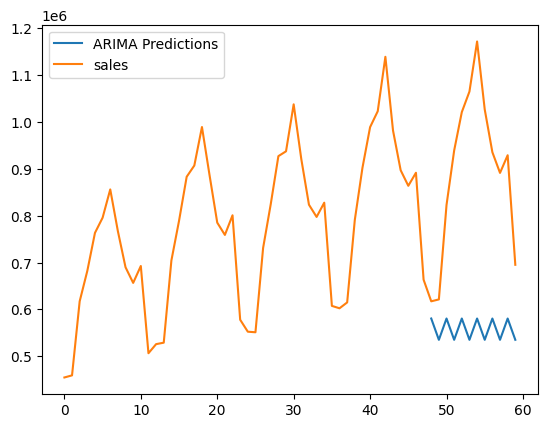

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
df['sales'].plot(legend=True)

In [43]:
mape = mean_absolute_percentage_error(test['sales'], pred)
mape

0.35141870584011375

## **3.b. Seasonal ARIMA**

In [44]:
model3=sm.tsa.statespace.SARIMAX(df['sales'],order=(1, 1, 2),seasonal_order=(1,1,2,12))
model3=model3.fit()

<Axes: >

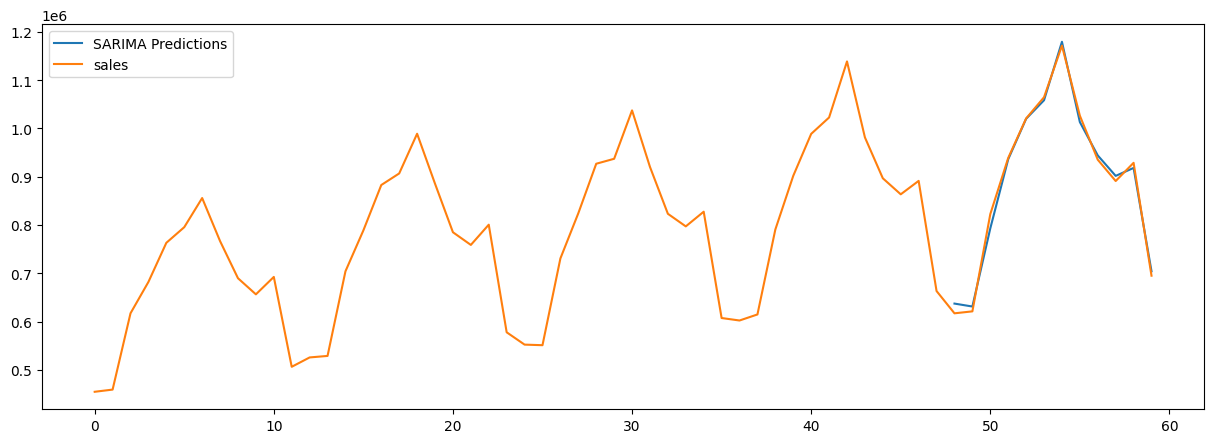

In [45]:
start=len(train)
end=len(train)+len(test)-1
pred2=model3.predict(start=start,end=end,typ='levels').rename('SARIMA Predictions')
plt.figure(figsize=(15,5))
pred2.plot(legend=True)
df['sales'].plot(legend=True)

In [46]:
test['sales'].mean()


894478.3333333334

In [47]:
mape = mean_absolute_percentage_error(test['sales'], pred2)
mape

0.013304076494511567